## Task 2.1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

1. Generación de Datos

In [8]:
#a. Generar 1000 datos
np.random.seed(42)
n = 1000

x = np.linspace(-3, 3, n)
y_real = 2*x**3 - 3*x**2 + 5*x + 3

# Agregar ruido
noise = np.random.normal(0, 10, n)
y = y_real + noise

# Normalización
x_mean = np.mean(x)
x_std = np.std(x)

y_mean = np.mean(y)
y_std = np.std(y)

x_norm = (x - x_mean) / x_std
y_norm = (y - y_mean) / y_std

# Crear matriz de diseño
X = np.column_stack([
    np.ones(n),
    x_norm,
    x_norm**2,
    x_norm**3
])

y_norm = y_norm.reshape(-1, 1)

def compute_loss(X, y, w):
    n = len(y)
    y_hat = X @ w
    return np.mean((y_hat - y)**2)

2. Algoritmos

In [9]:
#a. Batch Gradient Descentv
def batch_gd(X, y, lr=0.01, epochs=200):

    n, d = X.shape
    w = np.zeros((d, 1))
    
    losses = []
    times = []
    
    start = time.time()
    
    for epoch in range(epochs):
        y_hat = X @ w
        gradient = (2/n) * X.T @ (y_hat - y)
        w = w - lr * gradient
        
        losses.append(compute_loss(X, y, w))
        times.append(time.time() - start)
        
    return w, losses, times


In [10]:
# b. Stochastic Gradient Descent (SGD)
def sgd(X, y, lr=0.01, epochs=200):

    n, d = X.shape
    w = np.zeros((d, 1))
    
    losses = []
    times = []
    
    start = time.time()
    
    for epoch in range(epochs):
        for i in range(n):
            idx = np.random.randint(0, n)
            Xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            
            y_hat = Xi @ w
            gradient = 2 * Xi.T @ (y_hat - yi)
            w = w - lr * gradient
        
        losses.append(compute_loss(X, y, w))
        times.append(time.time() - start)
        
    return w, losses, times

In [11]:
# c. Mini-batch Gradient Descent
def mini_batch_gd(X, y, lr=0.01, epochs=200, batch_size=32):

    n, d = X.shape
    w = np.zeros((d, 1))
    
    losses = []
    times = []
    
    start = time.time()
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            m = len(y_batch)
            y_hat = X_batch @ w
            gradient = (2/m) * X_batch.T @ (y_hat - y_batch)
            w = w - lr * gradient
        
        losses.append(compute_loss(X, y, w))
        times.append(time.time() - start)
        
    return w, losses, times

3. Experimentación y Análisis

In [12]:
#a. Entrenamiento modelos
epochs = 100

w_batch, loss_batch, time_batch = batch_gd(X, y_norm, epochs=epochs)
w_sgd, loss_sgd, time_sgd = sgd(X, y_norm, epochs=epochs)
w_mini, loss_mini, time_mini = mini_batch_gd(X, y_norm, epochs=epochs)

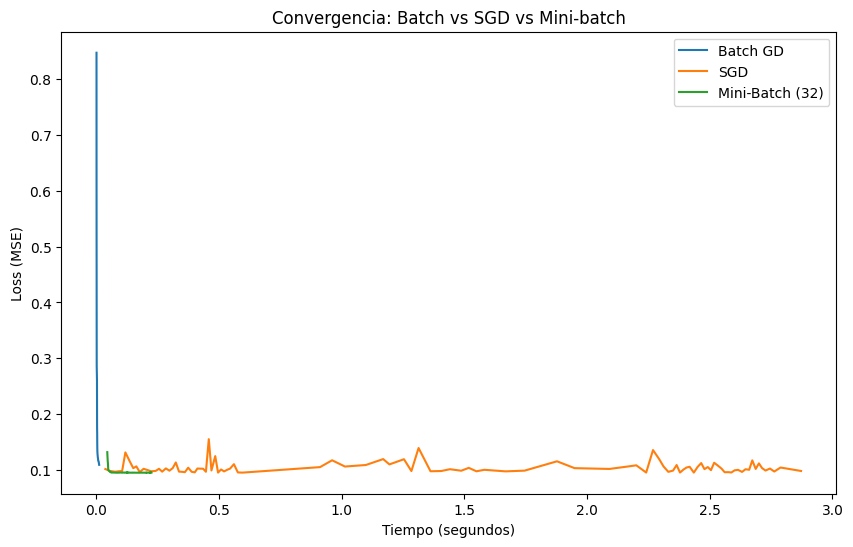

In [13]:
#b. Gráfica de Convergencia
plt.figure(figsize=(10,6))
plt.plot(time_batch, loss_batch, label="Batch GD")
plt.plot(time_sgd, loss_sgd, label="SGD")
plt.plot(time_mini, loss_mini, label="Mini-Batch (32)")
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Loss (MSE)")
plt.title("Convergencia: Batch vs SGD vs Mini-batch")
plt.legend()
plt.show()
